In [3]:
!pip install wordcloud emoji ftfy -q

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import re
# import emoji
from ftfy import fix_text

In [8]:
train_path = "../Data/train.csv"

In [9]:
df = pd.read_csv(train_path)

In [8]:
df.drop(["id","emotions"], axis=1, inplace=True)

In [9]:
cols = [col for col in  df.columns]

In [ ]:
cols.remove('text')

In [25]:
cols

['anger', 'fear', 'joy', 'sadness', 'surprise']

In [28]:
df.corr(numeric_only=True)

,anger,fear,joy,sadness,surprise
anger,1.000000,0.079726,-0.189703,0.094502,0.019343
fear,0.079726,1.000000,-0.473609,0.290298,0.160887
joy,-0.189703,-0.473609,1.000000,-0.316655,-0.096842
sadness,0.094502,0.290298,-0.316655,1.000000,-0.115213
surprise,0.019343,0.160887,-0.096842,-0.115213,1.000000


In [32]:
y = df.drop('text', axis=1)

In [44]:
counts = []
print("Count for each emotion.")
for i in cols:
  counts.append(np.sum(df[i]))
  print("Emotion: ", i, "-->  Count:" ,np.sum(df[i]))

# The dataset shows a significant class imbalance across the five emotion labels.

Count for each emotion.
Emotion:  anger -->  Count: 808
Emotion:  fear -->  Count: 3860
Emotion:  joy -->  Count: 1660
Emotion:  sadness -->  Count: 2171
Emotion:  surprise -->  Count: 1999


In [51]:
print("Emotions: ", cols)
print("Counts: " ,counts)

Emotions:  ['anger', 'fear', 'joy', 'sadness', 'surprise']
Counts:  [np.int64(808), np.int64(3860), np.int64(1660), np.int64(2171), np.int64(1999)]


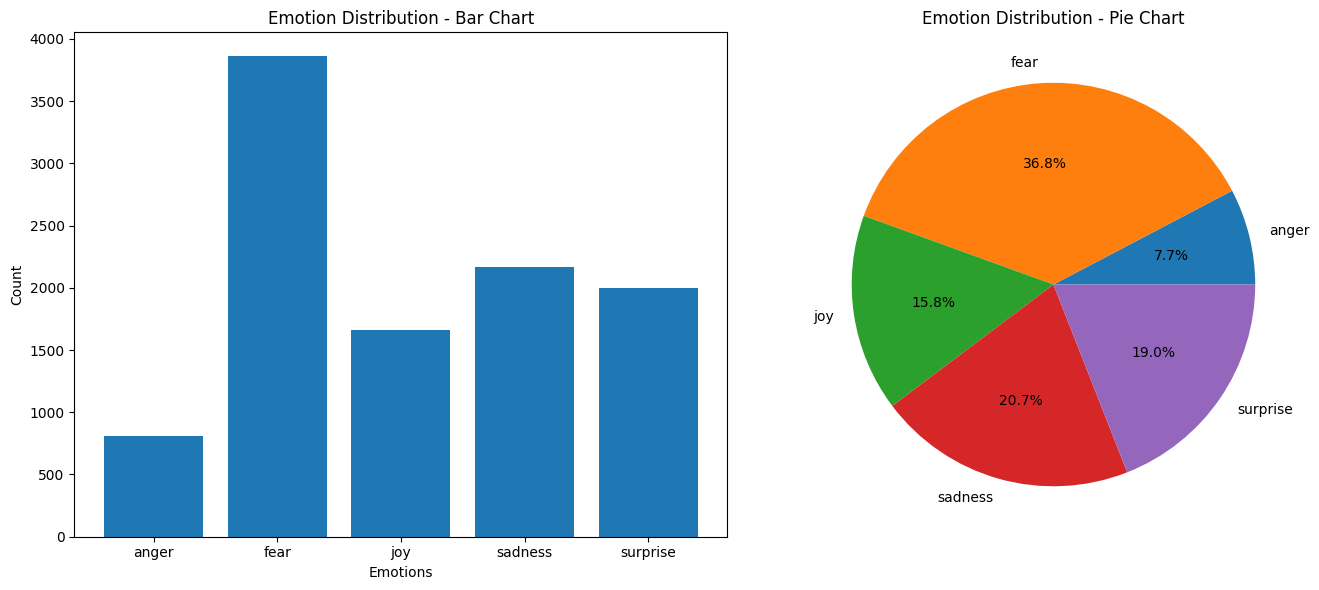

In [60]:
plt.figure(figsize=(14,6))

# Plot-1
plt.subplot(1,2,1)
plt.bar(cols, counts)
plt.xlabel("Emotions")
plt.ylabel("Count")
plt.title("Emotion Distribution - Bar Chart")


# Plot-2
plt.subplot(1,2,2)
plt.pie(counts,labels=cols,autopct="%1.1f%%")
plt.title("Emotion Distribution - Pie Chart")

plt.tight_layout()
plt.show()


### Word Cloud

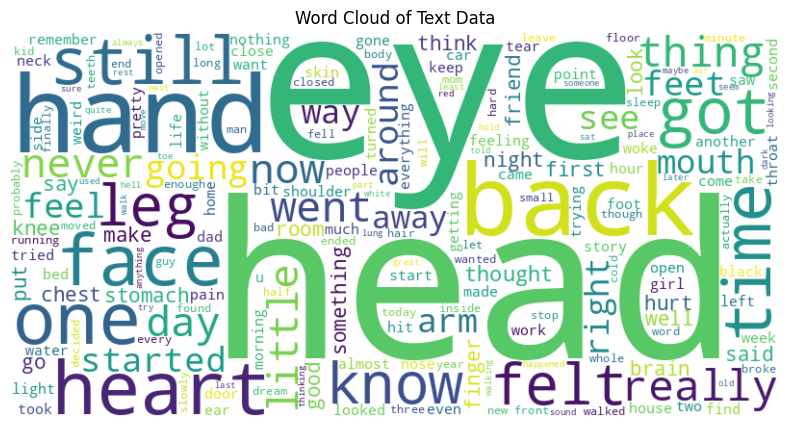

In [68]:
# Combine all text into one big string
all_text_pre_clean = " ".join(df["text"].astype(str))

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text_pre_clean)

# Plot
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Text Data")
plt.show()
